# Intravoxel incoherent motion (IVIM) imaging

In [1]:
import matplotlib.pyplot as plt
from dipy.reconst.ivim import IvimModel
from dipy.data.fetcher import read_ivim

In [2]:
img, gtab = read_ivim()

Creating new folder /user/rfick/home/.dipy/ivim
Download Progress: [##################################] 100.00%  of 0.00 MBDownloading "ivim.bvec" to /user/rfick/home/.dipy/ivim
Download Progress: [##################################] 100.00%  of 0.00 MBDownloading "ivim.nii.gz" to /user/rfick/home/.dipy/ivim
Download Progress: [##################################] 100.00%  of 261.96 MBFiles successfully downloaded to /user/rfick/home/.dipy/ivim


In [3]:
data = img.get_data()
print('data.shape (%d, %d, %d, %d)' % data.shape)

data.shape (256, 256, 54, 21)


In [ ]:
ivimmodel = IvimModel(gtab)

In [40]:
import cProfile

In [41]:
cProfile.run('ivimfit = ivimmodel.fit(data_slice)')

         42746423 function calls in 99.777 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   99.777   99.777 <string>:1(<module>)
   145503    0.068    0.000    0.798    0.000 _methods.py:25(_amax)
    19911    0.009    0.000    0.112    0.000 _methods.py:28(_amin)
   317728    0.143    0.000    1.472    0.000 _methods.py:31(_sum)
   273711    0.117    0.000    1.270    0.000 _methods.py:37(_any)
   726822    0.306    0.000    3.273    0.000 _methods.py:40(_all)
   134440    0.255    0.000    0.902    0.000 _numdiff.py:107(_prepare_bounds)
   134440    4.263    0.000    5.842    0.000 _numdiff.py:13(_adjust_scheme_to_bounds)
   134440    1.359    0.000   26.478    0.000 _numdiff.py:179(approx_derivative)
   415522    0.670    0.000   10.018    0.000 _numdiff.py:330(fun_wrapped)
   134440    3.402    0.000   14.472    0.000 _numdiff.py:377(_dense_difference)
   134440    2.188    0.000    2.363   

In [14]:
from dmipy.signal_models import gaussian_models
from dmipy.core.modeling_framework import MultiCompartmentModel
from dmipy.core.acquisition_scheme import gtab_dipy2mipy, acquisition_scheme_from_bvalues


In [6]:
ball1 = gaussian_models.G1Ball()
ball2 = gaussian_models.G1Ball()
ivim_mod = MultiCompartmentModel([ball1, ball2])

In [8]:
ivim_mod.parameter_ranges['G1Ball_1_lambda_iso'] = (3, 20)

In [9]:
ivim_mod.parameter_ranges

OrderedDict([('G1Ball_1_lambda_iso', (3, 20)),
             ('G1Ball_2_lambda_iso', (0.1, 3)),
             ('partial_volume_0', (0.01, 0.99)),
             ('partial_volume_1', (0.01, 0.99))])

In [11]:
z = 33
x1, x2 = 90, 155
y1, y2 = 90, 170
data_slice = data[x1:x2, y1:y2, z, :]

In [15]:
scheme_ivim = acquisition_scheme_from_bvalues(gtab.bvals * 1e6, gtab.bvecs, delta=1e-2, Delta=3e-2)

In [32]:
ivim_fit = ivim_mod.fit(scheme_ivim, data_slice, mask=data_slice[..., 0] > 0, solver='brute2fine', Ns=20)

Using parallel processing with 8 workers.
Setup brute2fine optimizer in 0.645612955093 seconds
Fitting of 5200 voxels complete in 36.1382291317 seconds.
Average of 0.0069496594484 seconds per voxel.


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

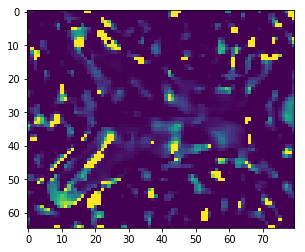

In [21]:
plt.imshow(ivim_fit.fitted_parameters['G1Ball_1_lambda_iso'])

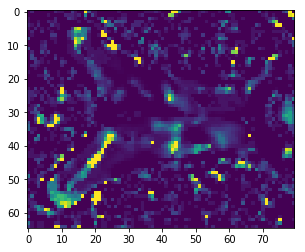

In [34]:
plt.imshow(ivim_fit.fitted_parameters['G1Ball_1_lambda_iso'])

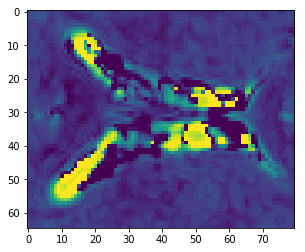

In [22]:
plt.imshow(ivim_fit.fitted_parameters['G1Ball_2_lambda_iso'])

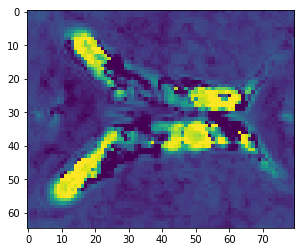

In [35]:
plt.imshow(ivim_fit.fitted_parameters['G1Ball_2_lambda_iso'])

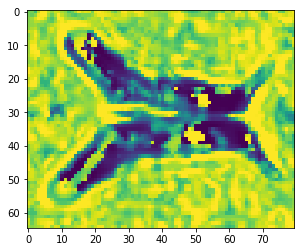

In [23]:
plt.imshow(ivim_fit.fitted_parameters['partial_volume_1'])

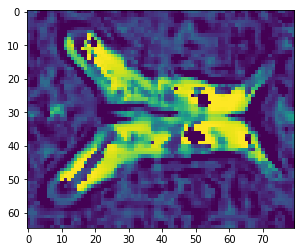

In [24]:
plt.imshow(ivim_fit.fitted_parameters['partial_volume_0'])

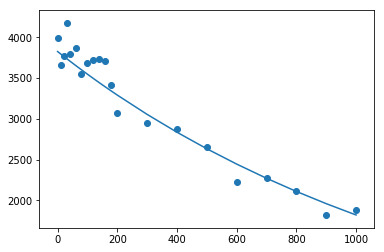

In [31]:
plt.plot(gtab.bvals, ivim_fit.predict()[10, 10])
plt.scatter(gtab.bvals, data_slice[10, 10])